# Illustration of pruning
This notebook shows how the different pruning rules will affect where the synapses are located on the dendritic tree. 
f1 -- remove a fraction of all synapses
mu2 -- remove synapses between pairs of neurons connected by too few synapses
softMax -- reduce the number of synapses between neuron pairs with a lot of synapses
distDep -- distance dependent pruning (dependent on distance to soma along dendrite)
a3 -- remove a fraction of all the synapses

In [1]:
import os
import snudda

snudda_data_base_path = os.path.join("..", "..", "..", "BasalGangliaData", "Parkinson", "20220225")
snudda_data_pd0 = os.path.join(snudda_data_base_path, "PD0")
snudda_data_pd2 = os.path.join(snudda_data_base_path, "PD2")

network_config_pd0 = os.path.join(snudda_data_base_path, "connectivity", "network-config.json")
network_config_pd2 = os.path.join(snudda_data_base_path, "connectivity", "network-config-PD-synapse-recovery.json")

network_path = os.path.join("networks","PD-pruning-test2k")
#network_path = os.path.join("networks","PD-example-2_ref_0.9")

network_path_pd0 = os.path.join(network_path, "PD0")
network_path_pd2_ref = os.path.join(network_path, "PD2-ref")
network_path_pd2 = os.path.join(network_path, "PD2")

network_size = 200 # 2000

rc = None  # Running in serial for now

In [2]:
import os

os.environ["IPYTHONDIR"] = ".ipython"
os.environ["IPYTHON_PROFILE"] = "default"

from snudda.core import Snudda

In [3]:
# !./start_ipcluster.sh 4

In [4]:
from snudda import SnuddaInit
struct_def = {"Striatum": network_size }

si = SnuddaInit(network_path=network_path_pd0, struct_def=struct_def, random_seed=123456, 
                snudda_data=snudda_data_pd0, connection_override_file=network_config_pd0)

Adding Striatum with 200 neurons
Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/0/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/0/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/3/parameters.json
Mechanism file not found: /home/

In [5]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path_pd0, rc=rc)
sp.place()

Reading SNUDDA_DATA=../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-pruning-test2k/PD0/network-config.json


In [6]:
# Run detect and prune in parallel by passing rc
try:
    from ipyparallel import Client
    u_file = os.path.join(".ipython", "profile_default", "security", "ipcontroller-client.json")
    rc = Client(url_file=u_file, timeout=20, debug=False)
except:
    print("No parallel workers found")
    rc = None

Waiting for connection file: .ipython/profile_default/security/ipcontroller-client.json
No parallel workers found


In [7]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path_pd0, rc=rc)
sd.detect()
Snudda.cleanup_workers_rc(rc=rc)

Reading SNUDDA_DATA=../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-pruning-test2k/PD0/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 36/180 (200 neurons)
Processing hyper voxel : 66/180 (190 neurons)
Processing hyper voxel : 41/180 (189 neurons)
Processing hyper voxel : 37/180 (156 neurons)
Processing hyper voxel : 71/180 (145 neurons)
Processing hyper voxel : 35/180 (127 neurons)
Processing hyper voxel : 67/180 (102 neurons)
Processing hyper voxel : 42/180 (93 neurons)
Processing hyper voxel : 31/180 (81 neurons)
Processing hyper voxel : 6/180 (81 neurons)
Processing hyper voxel : 65/180 (72 neurons)
Processing hyper voxel : 40/180 (68 neurons)
Processing hyper voxel : 72/180 (54 neurons)
Processing hyper voxel : 11/180 (50 neurons)
Processing hyper voxel : 61/180 (49 neurons)
Processing hyper voxel : 70/180 (30 neurons)
Processing hyper voxel : 5/180 (26 neurons)
Processing hyper voxel : 32/180 (25 neurons)
Pr

In [8]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path_pd0, keep_files=True, rc=rc)
sp.prune()
Snudda.cleanup_workers_rc(rc=rc)

output_file_pd0 = os.path.join(network_path_pd0, "network-synapses.hdf5")
save_prune_all = os.path.join(network_path_pd0, "network-synapses-prune-all.hdf5")
os.rename(output_file_pd0, save_prune_all)

No file networks/PD-pruning-test2k/PD0/pruning_merge_info.json
Read 448695 out of total 448695 synapses
Read 5 out of total 5 gapJunctions


# Let's also generate the reference PD2 denovo detection version

In [9]:
si = SnuddaInit(network_path=network_path_pd2_ref, struct_def=struct_def, random_seed=123456, 
                snudda_data=snudda_data_pd2, connection_override_file=network_config_pd2)

Adding Striatum with 200 neurons
Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/0/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/0/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/1/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/1/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/3/parameters.json
Mechanism file not found: /home/

In [10]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path_pd2_ref, verbose=False, rc=rc)
sp.place()
Snudda.cleanup_workers_rc(rc=rc)

Reading SNUDDA_DATA=../../../BasalGangliaData/Parkinson/20220225/PD2 from networks/PD-pruning-test2k/PD2-ref/network-config.json


In [11]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path_pd2_ref, rc=rc)
sd.detect()
Snudda.cleanup_workers_rc(rc=rc)

Reading SNUDDA_DATA=../../../BasalGangliaData/Parkinson/20220225/PD2 from networks/PD-pruning-test2k/PD2-ref/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 36/180 (200 neurons)
Processing hyper voxel : 41/180 (198 neurons)
Processing hyper voxel : 66/180 (176 neurons)
Processing hyper voxel : 71/180 (157 neurons)
Processing hyper voxel : 37/180 (150 neurons)
Processing hyper voxel : 42/180 (125 neurons)
Processing hyper voxel : 67/180 (91 neurons)
Processing hyper voxel : 35/180 (87 neurons)
Processing hyper voxel : 72/180 (73 neurons)
Processing hyper voxel : 40/180 (73 neurons)
Processing hyper voxel : 6/180 (69 neurons)
Processing hyper voxel : 11/180 (59 neurons)
Processing hyper voxel : 65/180 (41 neurons)
Processing hyper voxel : 31/180 (38 neurons)
Processing hyper voxel : 70/180 (32 neurons)
Processing hyper voxel : 7/180 (26 neurons)
Processing hyper voxel : 12/180 (22 neurons)
Processing hyper voxel : 61/180 (20 neurons)

In [12]:
sp = SnuddaPrune(network_path=network_path_pd2_ref, keep_files=True, rc=rc)
sp.prune()
Snudda.cleanup_workers_rc(rc=rc)

output_file_pd2_ref = os.path.join(network_path_pd2_ref, "network-synapses.hdf5")
save_prune_all = os.path.join(network_path_pd2_ref, "network-synapses-prune-all.hdf5")
os.rename(output_file_pd2_ref, save_prune_all)

No file networks/PD-pruning-test2k/PD2-ref/pruning_merge_info.json
Read 280762 out of total 280762 synapses
Read 5 out of total 5 gapJunctions


# Pruning for the different versions (PD2 ref)

In [13]:
import json
orig_config_file = os.path.join(network_path_pd2_ref, "network-config.json")
with open(orig_config_file, "r") as f:
    orig_config = json.load(f)

In [14]:
config_options = ["a3", "distPruning", "f1", "softMax", "mu2"]
remaining_config_options = config_options.copy()
modified_config = orig_config.copy()

orig_config_copy = os.path.abspath(os.path.join(network_path_pd2_ref, f"network-config-{'-'.join(config_options)}.json"))
orig_network_copy = os.path.abspath(os.path.join(network_path_pd2_ref, f"network-synapses-{'-'.join(config_options)}.hdf5"))

if not os.path.exists(orig_network_copy):
    os.symlink("network-synapses-prune-all.hdf5", orig_network_copy)
    
if not os.path.exists(orig_config_copy):
    os.symlink("network-config.json", orig_config_copy)

config_file_list_pd2_ref = [orig_config_copy]
output_file_list_pd2_ref = [orig_network_copy]

for param in config_options[::-1]:
    for neuron_pair in modified_config["Connectivity"]:
        for con_type in modified_config["Connectivity"][neuron_pair]:
            modified_config["Connectivity"][neuron_pair][con_type]["pruning"][param] = None
            
            if "pruningOther" in modified_config["Connectivity"][neuron_pair][con_type]:
                modified_config["Connectivity"][neuron_pair][con_type]["pruningOther"][param] = None

            
    remaining_config_options = remaining_config_options[:-1]
    
    if len(remaining_config_options) > 0:
        opt_name = "-".join(remaining_config_options)
    else:
        opt_name = "NONE"
    
    config_file_name = os.path.join(network_path_pd2_ref, f"network-config-{opt_name}.json")
    output_file_name = os.path.join(network_path_pd2_ref, f"network-synapses-{opt_name}.hdf5")
                                    
    config_file_list_pd2_ref.append(config_file_name)
    output_file_list_pd2_ref.append(output_file_name)

    with open(config_file_name, "w") as f:
        json.dump(modified_config, f, indent=4)

In [15]:
for config_file, output_file_new in zip(config_file_list_pd2_ref, output_file_list_pd2_ref):
    print(f"Processing {config_file}")
    sp = SnuddaPrune(network_path=network_path_pd2_ref, keep_files=True, config_file=config_file, rc=rc)
    sp.prune()
    os.rename(output_file_pd2_ref, output_file_new)
    Snudda.cleanup_workers_rc(rc=rc)

Processing /home/hjorth/HBP/Snudda/examples/notebooks/networks/PD-pruning-test2k/PD2-ref/network-config-a3-distPruning-f1-softMax-mu2.json
Processing networks/PD-pruning-test2k/PD2-ref/network-config-a3-distPruning-f1-softMax.json
Processing networks/PD-pruning-test2k/PD2-ref/network-config-a3-distPruning-f1.json
Processing networks/PD-pruning-test2k/PD2-ref/network-config-a3-distPruning.json
Processing networks/PD-pruning-test2k/PD2-ref/network-config-a3.json
Processing networks/PD-pruning-test2k/PD2-ref/network-config-NONE.json


# Pruning different version (WT)

Now for the tricky bit, we need to first create multiple config files that only keep some of the pruning steps.

In [16]:
import json
orig_config_file = os.path.join(network_path_pd0, "network-config.json")
with open(orig_config_file, "r") as f:
    orig_config = json.load(f)

In [17]:
config_options = ["a3", "distPruning", "f1", "softMax", "mu2"]
remaining_config_options = config_options.copy()
modified_config = orig_config.copy()

orig_config_copy = os.path.abspath(os.path.join(network_path_pd0, f"network-config-{'-'.join(config_options)}.json"))
orig_network_copy = os.path.abspath(os.path.join(network_path_pd0, f"network-synapses-{'-'.join(config_options)}.hdf5"))

if not os.path.exists(orig_network_copy):
    os.symlink("network-synapses-prune-all.hdf5", orig_network_copy)
    
if not os.path.exists(orig_config_copy):
    os.symlink("network-config.json", orig_config_copy)

config_file_list = [orig_config_copy]
output_file_list = [orig_network_copy]

for param in config_options[::-1]:
    for neuron_pair in modified_config["Connectivity"]:
        for con_type in modified_config["Connectivity"][neuron_pair]:
            modified_config["Connectivity"][neuron_pair][con_type]["pruning"][param] = None
            
            if "pruningOther" in modified_config["Connectivity"][neuron_pair][con_type]:
                modified_config["Connectivity"][neuron_pair][con_type]["pruningOther"][param] = None

            
    remaining_config_options = remaining_config_options[:-1]
    
    if len(remaining_config_options) > 0:
        opt_name = "-".join(remaining_config_options)
    else:
        opt_name = "NONE"
    
    config_file_name = os.path.join(network_path_pd0, f"network-config-{opt_name}.json")
    output_file_name = os.path.join(network_path_pd0, f"network-synapses-{opt_name}.hdf5")
                                    
    config_file_list.append(config_file_name)
    output_file_list.append(output_file_name)

    with open(config_file_name, "w") as f:
        json.dump(modified_config, f, indent=4)

The reason we did the PD2 reference pruning first is that we use it in the degeneration below (the remapping). The loop below does two things now, first the WT pruning, then the degeneration for that pruning set. There are so many different versions to keep track of that we have to be careful.

In [18]:
from snudda.utils.swap_to_degenerated_morphologies_extended import SwapToDegeneratedMorphologiesExtended

output_file_list_pd2 = []

for config_file, network_file_pd0, network_file_pd2_ref in zip(config_file_list, output_file_list, output_file_list_pd2_ref):
    print(f"Processing {config_file}")
    sp = SnuddaPrune(network_path=network_path_pd0, keep_files=True, config_file=config_file, rc=rc)
    sp.prune()
    os.rename(output_file_pd0, network_file_pd0)
    Snudda.cleanup_workers_rc(rc=rc)
    
    network_file_pd2 = network_file_pd0.replace(network_path_pd0, network_path_pd2)
    output_file_list_pd2.append(network_file_pd2)
    
    assert network_file_pd2 != network_file_pd0
    
    print(f"Degenerating to {network_file_pd2}") 
    swap = SwapToDegeneratedMorphologiesExtended(original_network_file=network_file_pd0,
                                                 updated_network_file=network_file_pd2_ref,
                                                 output_network_file=network_file_pd2,
                                                 original_snudda_data_dir=snudda_data_pd0,
                                                 updated_snudda_data_dir=snudda_data_pd2)
    swap.write_new_network_file()
    swap.close()    

Processing /home/hjorth/HBP/Snudda/examples/notebooks/networks/PD-pruning-test2k/PD0/network-config-a3-distPruning-f1-softMax-mu2.json
Degenerating to /home/hjorth/HBP/Snudda/examples/notebooks/networks/PD-pruning-test2k/PD2/network-synapses-a3-distPruning-f1-softMax-mu2.hdf5
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/1/DR-rat-Mar-13-08-1-536-R-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/chin/str-chin-e170614_cell6-m17JUL301751_170614_no6_MD_cell_1_x63-v20190710/optim_chin_morph_renamed2019-11-08.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/3/MTC251001A-IDB-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/0/BE104E-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hj

# Analyse

In [19]:
fig_path = os.path.join(network_path, "figures")
if not os.path.isdir(fig_path):
    os.mkdir(fig_path)

Analysing /home/hjorth/HBP/Snudda/examples/notebooks/networks/PD-pruning-test2k/PD0/network-synapses-a3-distPruning-f1-softMax-mu2.hdf5, synapses onto dSPN
Writing figure to networks/PD-pruning-test2k/figures/synapse-locations-dSPN-WT-a3-distPruning-f1-softMax-mu2.png
Analysing /home/hjorth/HBP/Snudda/examples/notebooks/networks/PD-pruning-test2k/PD2-ref/network-synapses-a3-distPruning-f1-softMax-mu2.hdf5, synapses onto dSPN
Writing figure to networks/PD-pruning-test2k/figures/synapse-locations-dSPN-PD2 ref-a3-distPruning-f1-softMax-mu2.png
Analysing /home/hjorth/HBP/Snudda/examples/notebooks/networks/PD-pruning-test2k/PD2/network-synapses-a3-distPruning-f1-softMax-mu2.hdf5, synapses onto dSPN
Writing figure to networks/PD-pruning-test2k/figures/synapse-locations-dSPN-PD2 degen-a3-distPruning-f1-softMax-mu2.png
Analysing networks/PD-pruning-test2k/PD0/network-synapses-a3-distPruning-f1-softMax.hdf5, synapses onto dSPN
Writing figure to networks/PD-pruning-test2k/figures/synapse-locatio

/tmp/ipykernel_61368/3219955250.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Writing figure to networks/PD-pruning-test2k/figures/synapse-locations-ChIN-WT-a3-distPruning-f1-softMax.png
Analysing networks/PD-pruning-test2k/PD2-ref/network-synapses-a3-distPruning-f1-softMax.hdf5, synapses onto ChIN
Writing figure to networks/PD-pruning-test2k/figures/synapse-locations-ChIN-PD2 ref-a3-distPruning-f1-softMax.png
Analysing networks/PD-pruning-test2k/PD2/network-synapses-a3-distPruning-f1-softMax.hdf5, synapses onto ChIN
Writing figure to networks/PD-pruning-test2k/figures/synapse-locations-ChIN-PD2 degen-a3-distPruning-f1-softMax.png
Analysing networks/PD-pruning-test2k/PD0/network-synapses-a3-distPruning-f1.hdf5, synapses onto ChIN
Writing figure to networks/PD-pruning-test2k/figures/synapse-locations-ChIN-WT-a3-distPruning-f1.png
Analysing networks/PD-pruning-test2k/PD2-ref/network-synapses-a3-distPruning-f1.hdf5, synapses onto ChIN
Writing figure to networks/PD-pruning-test2k/figures/synapse-locations-ChIN-PD2 ref-a3-distPruning-f1.png
Analysing networks/PD-prun

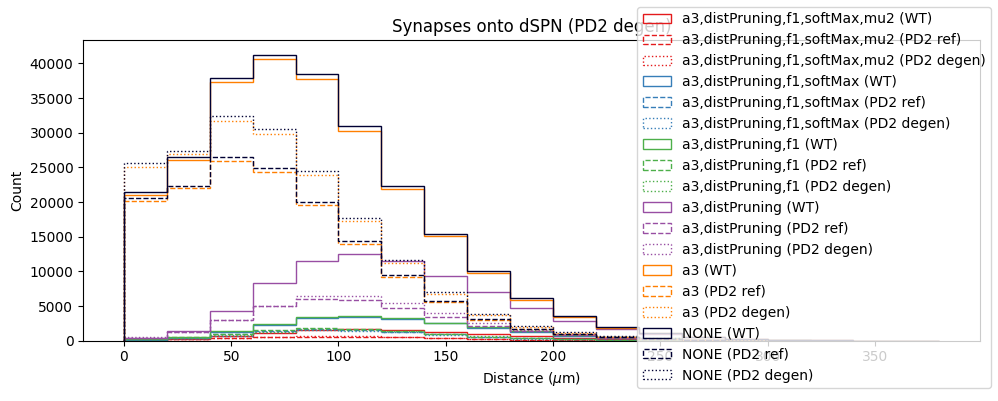

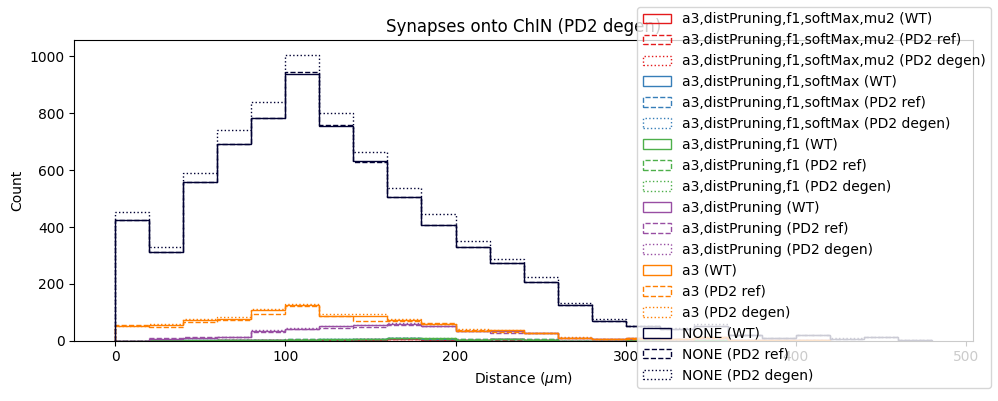

<Figure size 1000x400 with 0 Axes>

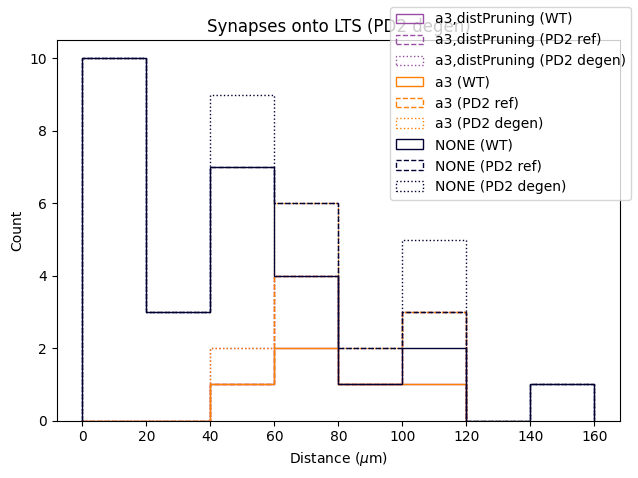

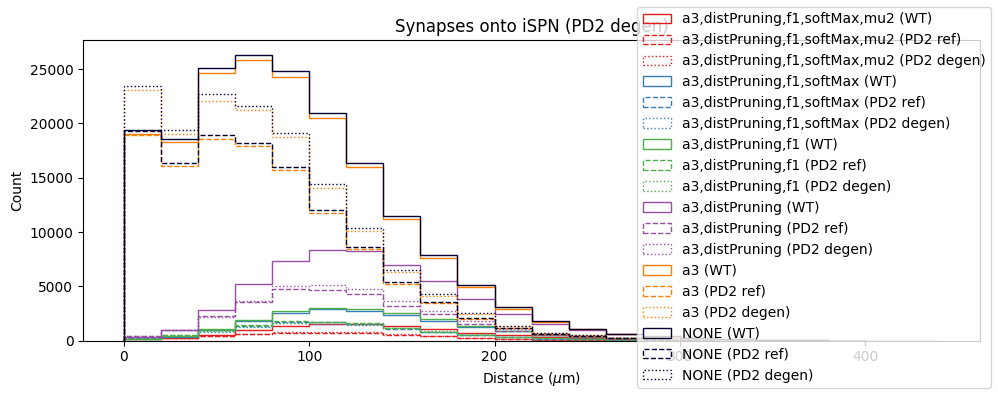

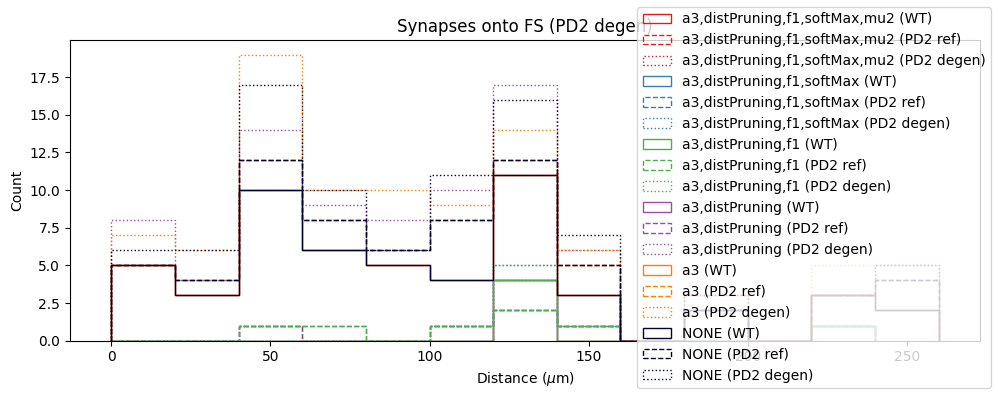

In [20]:
import matplotlib.pyplot as plt 
from snudda.analyse.analyse_synapse_location import AnalyseSynapseLocation
import numpy as np

sa_list = []

for network_file_path_wt, network_file_path_pd2_ref, network_file_path_pd2 in zip(output_file_list, output_file_list_pd2_ref, output_file_list_pd2):
    sa_list.append((AnalyseSynapseLocation(network_file_path_wt), "WT"))
    sa_list.append((AnalyseSynapseLocation(network_file_path_pd2_ref), "PD2 ref"))
    sa_list.append((AnalyseSynapseLocation(network_file_path_pd2), "PD2 degen"))
    

neuron_types = sa_list[0][0].snudda_loader.get_neuron_types(return_set=True)
pre_type = None

colour_list = np.array([[228,26,28],
                        [228,26,28], 
                        [228,26,28], 
                        [55,126,184], 
                        [55,126,184], 
                        [55,126,184], 
                        [77,175,74],
                        [77,175,74],
                        [77,175,74],
                        [152,78,163],
                        [152,78,163],
                        [152,78,163],
                        [255,127,0],
                        [255,127,0],
                        [255,127,0],
                        [0,0,51],
                        [0,0,51],
                        [0,0,51]]) / 255

line_style = ["-", "--", ":"]


for post_type in neuron_types:
    fig = plt.figure(figsize=(10,4))
    for idx, (sa, condition) in enumerate(sa_list):
        print(f"Analysing {sa.snudda_loader.network_file}, synapses onto {post_type}")
        f_name = os.path.basename(sa.snudda_loader.network_file).replace("network-synapses-","")
        fig = sa.plot_synapse_distance_to_soma(pre_type=pre_type, post_type=post_type, figure=fig, show_plot=False, 
                                               title=f"Synapses onto {post_type} ({condition})", label=f'{f_name.replace(".hdf5", "").replace("-", ",")} ({condition})',
                                               fig_path=os.path.join(network_path, "figures", f'synapse-locations-{post_type}-{condition}-{f_name.replace(".hdf5", ".png")}'),
                                               colour=colour_list[idx], linestyle=line_style[idx % 3])
    if fig is not None:
        fig.tight_layout()
        fig.legend(loc="upper right")
        fig.show()

In [21]:
!ipcluster stop

2023-07-21 17:41:10.758 [IPClusterStop] CRITICAL | Could not find cluster file [Errno 2] No such file or directory: '/home/hjorth/HBP/Snudda/examples/notebooks/.ipython/profile_default/security/cluster-.json'


# Add histogram over number of synapses

In [ ]:
for pre_type in neuron_types:
    for post_type in neuron_types:
        fig = plt.figure(figsize=(10,4))
        for idx, (sa, condition) in enumerate(sa_list):
            print(f"Analysing {sa.snudda_loader.network_file}, synapses onto {post_type}")
            f_name = os.path.basename(sa.snudda_loader.network_file).replace("network-synapses-","")
            fig = sa.plot_synapses_per_pair(pre_type=pre_type, post_type=post_type, figure=fig, show_plot=False, 
                                           title=f"Synapses onto {post_type} ({condition})", label=f'{f_name.replace(".hdf5", "").replace("-", ",")} ({condition})',
                                           fig_path=os.path.join(network_path, "figures", f'synapses-per-pair-{pre_type}-{post_type}-{condition}-{f_name.replace(".hdf5", ".png")}'),
                                           colour=colour_list[idx], linestyle=line_style[idx % 3])
        if fig is not None:
            fig.tight_layout()
            fig.legend(loc="upper right")
            fig.show()

Analysing /home/hjorth/HBP/Snudda/examples/notebooks/networks/PD-pruning-test2k/PD0/network-synapses-a3-distPruning-f1-softMax-mu2.hdf5, synapses onto dSPN
Traceback (most recent call last):
  File "/home/hjorth/HBP/Snudda/snudda/analyse/analyse_synapse_location.py", line 83, in plot_synapses_per_pair
    plt.hist(num_synapses, bins=bins, label=label, histtype="step", color=colour, linestyle=linestyle)
  File "/home/hjorth/HBP/Snudda/venv/lib/python3.9/site-packages/matplotlib/pyplot.py", line 2645, in hist
    return gca().hist(
  File "/home/hjorth/HBP/Snudda/venv/lib/python3.9/site-packages/matplotlib/__init__.py", line 1442, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "/home/hjorth/HBP/Snudda/venv/lib/python3.9/site-packages/matplotlib/axes/_axes.py", line 6746, in hist
    raise ValueError(f"The 'color' keyword argument must have one "
ValueError: The 'color' keyword argument must have one color per dataset, but 1497 datasets and 1 colors were prov

ipdb>  num_synapses.shape


(1, 1497)


ipdb>              plt.hist(num_synapses, bins=bins.flatten(), label=label, histtype="step", color=colour, linestyle=linestyle)


*** ValueError: The 'color' keyword argument must have one color per dataset, but 1497 datasets and 1 colors were provided


ipdb>              plt.hist(num_synapses.flatten(), bins=bins, label=label, histtype="step", color=colour, linestyle=linestyle)


*** ValueError: The 'color' keyword argument must have one color per dataset, but 1497 datasets and 1 colors were provided


ipdb>  num_synapses.flatten().shape


(1, 1497)


ipdb>  um_synapses.T.flatten()


*** NameError: name 'um_synapses' is not defined
